In [2]:
import pandas as pd


In [3]:
df=pd.read_csv(r"C:\Users\marwa\OneDrive\Desktop\car dataset\car_sales_data.csv")
df

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


In [4]:
df.head()        #by default returns top 5 rows


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [5]:
df.tail()       #by default last 5 rows


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630
49999,VW,Golf,1.4,Diesel,2012,109300,10400


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [7]:
df.shape

(50000, 7)

In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [9]:
df.duplicated().sum()


np.int64(12)

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()


np.int64(0)

In [12]:
df.isnull().sum()


Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [13]:
df.dropna(inplace=True)


In [14]:
df.columns

Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')

In [15]:
df['Manufacturer'].value_counts()

Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64

In [16]:
df['Manufacturer'].unique()

array(['Ford', 'Porsche', 'Toyota', 'VW', 'BMW'], dtype=object)

In [17]:
df.drop(['Model'],inplace= True, axis= 1)


In [19]:
df.columns

Index(['Manufacturer', 'Engine size', 'Fuel type', 'Year of manufacture',
       'Mileage', 'Price'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df['Fuel type'] = le.fit_transform(df['Fuel type'])

df['Manufacturer'] = le.fit_transform(df['Manufacturer'])


In [21]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 49988 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         49988 non-null  int64  
 1   Engine size          49988 non-null  float64
 2   Fuel type            49988 non-null  int64  
 3   Year of manufacture  49988 non-null  int64  
 4   Mileage              49988 non-null  int64  
 5   Price                49988 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.7 MB
None
   Manufacturer  Engine size  Fuel type  Year of manufacture  Mileage  Price
0             1          1.0          2                 2002   127300   3074
1             2          4.0          2                 2016    57850  49704
2             1          1.6          0                 2014    39190  24072
3             3          1.8          1                 1988   210814   1705
4             4          1.0          2                 2

In [22]:
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target variable


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((39990, 5), (9998, 5), (39990,), (9998,))

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 5365233.554938026
Mean Absolute Error (MAE): 1050.8453800402938
R² Score: 0.980180558501688


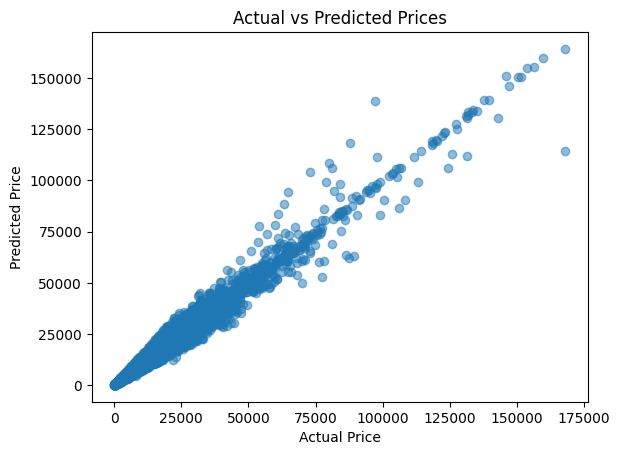

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
